# **Atividade prática: Algoritmo k-Nearest Neighbors (KNN)**
### Aluna: Camila Alves Dias, número: 320636

1.   Realizar uma ​ implementação própria​ do algoritmo KNN

*   O primeiro passo é calcular as distâncias (euclidiana e manhattan)
*   Depois obtemos os vizinhos mais próximos (Nearest Neighbors)
*  E por fim é feito as predições 




2.   Avaliar o uso do algoritmo KNN com diferentes valores de k
3.   Verificar o efeito da normalização de dados sobre os resultados



### Fazer os imports das bibliotecas

In [171]:
import pandas as pd # biblioteca de análise de dados

from csv import reader # ler arquivos csv
#from sys import exit 

from math import sqrt # retorna a raiz quadrada de qualquer número

import operator # exporta um conjunto de funções dos operadores de Python

from operator import itemgetter # constrói um chamável que assume um objeto iterável 
#(por exemplo, lista, tupla, conjunto) como entrada e busca o enésimo elemento dele.

import numpy as np # biblioteca que realiza cálculos em arrays multidimensionais

### Abaixo encontra-se a classe com duas funções de medidas: medida Euclidiana e Manhattan

Descrição do cálculo da distância euclidiana:
sqrt(sum i to N (x1_i – x2_i)^2)

entrada = vetor1, vetor2. São os vetores de entrada para os quais a distância deve ser calculada.

saída = distância euclidiana calculada de dois vetores.

Descrição do cálculo da distância Manhattan:

Entrada = Pega 2 vetores e retorna a distância de manhattan. A ideia é parecida com a função da distância Euclidiana. 

A saída será a distância Manhattan de dois vetores de entrada


In [172]:
class dist_metric:
# métodos para calcular métricas de distância 
  def __init__(self):
    pass
  
  # Função para calcular a distância euclidiana
  def dist_euclidiana(self, vector1, vector2):
    self.vectorA, self.vectorB = vector1, vector2
    distance = 0.0
    for i in range(len(self.vectorA)-1):
      distance += sqrt(((self.vectorA[i]) - (self.vectorB[i]))** 2)
     #distance += (self.vectorA[i] - self.vectorB[i])**2
    return distance
  
  # Função para calcular a distância de Manhattan
  def dist_manhattan(self, vector1, vector2):
    self.vectorA, self.vectorB = vector1, vector2
    return sum(abs(np.array(self.vectorA) - np.array(self.vectorB)))

### Algoritmo K-NearestNeighbors 
*   entrada k: total de vizinhos
*   dist_metric: tipo de distancia metrica que sera utilizada. 

A função getNeighbors seleciona o subconjunto com a menor distância, qual é calculada na função euclidean_dist da classe dist_metric.

Todo o conjunto de dados de treinamento é armazenado. 

Quando uma predição é necessária, os registros *k-most similar* a um novo registro do conjunto de dados de treinamento são localizados. A partir desses vizinhos, uma previsão resumida é feita.

O dataset presente possui 2 classes binárias (cancer benigno e cancer maligno). 

Dentro do dataset pode haver um ponto misterioso cuja classe é necessária prever. 

Para descobrir a qual classe esse ponto pertence, é necessário comparar a distância (euclidiana ou manhattan) do ponto misterioso com as amostras de treinamento e selecionar os K vizinhos mais próximos.

O k indica o número de amostras de treinamento próximo a serem consideradas ao prever um ponto de teste não rotulado.

O label de classe do novo ponto é determinado pelo voto da maioria de seus k vizinhos mais próximos. O novo ponto será atribuído à turma com maior número de votos.




In [173]:
class kNNClassifier:
  #def __init__(self,k = 3, dist_metric = 'euclidiana'):
    #pass
  
  def fit(self, xTrain, yTrain):
    # treina o modelo kNN com data x
    assert len(xTrain) == len(yTrain)
    self.trainData = xTrain # treina os dados com as coordenadas 
    self.trainLabels = yTrain # labels/rotulos do dataset de treino

  def getNeighbors(self, testRow):
    # input testRow: dados de teste com coordenadas
    calcDM = dist_metric()
    distances = []
    for i, trainRow in enumerate(self.trainData):
      
      # utiliza a distancia euclidiana
      if self.dist_metric == 'euclidiana': 
        distances.append([trainRow, calcDM.dist_euclidiana(testRow, trainRow), self.trainLabels[i]])
      
      # utiliza a distancia manhattan
      elif self.dist_metric == 'manhattan': 
        distances.append([trainRow, calcDM.dist_manhattan(testRow, trainRow), self.trainLabels[i]])
      
      distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for index in range(0, self.k):
      neighbors.append(distances[index])
    return neighbors
  
  def predict(self, xTest, k, dist_metric):
  # aqui o modelo kNN é aplicado no dataset de teste
    self.testData = xTest # dados de teste com coordenadas
    self.k = k # numero de vizinhos
    self.dist_metric = dist_metric # funcao de distancia
    predictions = []
    for i, testCase in enumerate(self.testData):
      neighbors = self.getNeighbors(testCase)
      output= [row[-1] for row in neighbors]
      prediction = max(set(output), key=output.count)
      predictions.append(prediction)
    return predictions # saída: rótulo previsto/predicted label 

### A seção abaixo possui a função de avalição acurácia

In [174]:
def accuracy_calc(actual, predictions):
  # calcula a acuracia das previsões
  assert len(actual) == len(predictions)
  correct = 0
  for i in range(len(actual)):
    if actual[i] == predictions[i]:
      correct += 1
  print("Acuracia do modelo kNN: ", correct / float(len(actual)) * 100.0)

### abaixo é feito o processamento do arquivo lido

In [175]:
def readData(fileName):
  data = []
  labels = []
  with open(fileName, "r") as file:
    lines = file.readlines() 
  for line in lines:
    splitline = line.strip().split(',')
    data.append(splitline[:-1]) # vetor com os dados do dataframe
    labels.append(splitline[-1]) # vetor com os labels/classes
  return data, labels

### Abaixo é solicitado quais serão os datasets de treino e teste 

In [176]:
# carrega o conjunto de dados de treinamento 
training_file = input('Digite o nome do arquivo de dados de treinamento : ')
trainFile = str(training_file)

trainData, trainLabel = readData(trainFile)
trainData = np.array(trainData, dtype=np.float32)

trainFeatures = []
for row in trainData:
  index = row[0:]
  temp = [(item) for item in index]
  trainFeatures.append(temp)
trainLabels = [(label) for label in trainLabel]

print ('Train set: ' + repr(len(trainData)))

Digite o nome do arquivo de dados de treinamento : cancer_train.csv
Train set: 456


In [177]:
# carrega o conjunto de dados de teste 
test_file = input('Digite o nome do arquivo de dados de teste : ')
testFile = str(test_file)

testData, testLabel = readData(testFile)
testData = np.array(testData, dtype=np.float32)

testFeatures = []
for row in testData:
  index = row[0:]
  temp = [(item) for item in index]
  testFeatures.append(temp)
testLabels = [(label) for label in testLabel]
print ('Test set: ' + repr(len(testData)))

Digite o nome do arquivo de dados de teste : cancer_test.csv
Test set: 115


### Na seção abaixo é chamado a classe kNNClassifier, qual contém as funções de distancias 

In [178]:
knn = kNNClassifier() # chama a função kNN
knn.fit(trainFeatures, trainLabels) # treina o modelo com a base de treino
print(trainLabels) # exibe o vetor de targets

['target', '0.0', '0.0', '0.0', '0.0', '1.0', '0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '1.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '1.0', '0.0', '0.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '0.0', '1.0', '1.0', '1.0', '0.0', '0.0', '0.0', '0.0', '1.0', '1.0', '0.0', '0.0', '0.0', '0.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '0.0', '0.0', '0.0', '1.0', '1.0', '0.0', '1.0', '1.0', '0.0', '0.0', '1.0', '0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '1.0', '1.0', '0.0', '1.0', '1.0', '0.0', '1.0', '0.0', '0.0', '1.0', '1.0', '0.0', '1.0', '1.0', '0.0', '0.0', '1.0', '1.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '1.0', '0.0', '1.0', '1.0', '0.0', '1.0', '0.0', '0.0', '1.0', '1.0', '1.0', '0.0', '0.0', '0.0', '1.0', '0.0', '1.0', '1.0', '0.0', '1.0', '0.0', '0.0', '1.0', '0.0', '1.0', '0.0', '0.0', '0.0', '1.0', '0.0', '1.0', '0.0', '0.0', '0.0', '1.0', '1.0', '0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '1

### Abaixo é apresentado a execução da predição para o valor de k dado e a medida escolhida. Após, o cálculo da acurácia é realizada a seguir. 

In [180]:
# loop onde apresenta os resultados com varios valores de k para exibição
i = 0
exec = input('Digite quantas vezes irá executar: ') # quantas vezes ira executar o loop
exec = int(exec)
while i in range(exec): 
  vizinho = input('Digite o valor do k : ')
  k = int(vizinho)

  dist_input = input('Digite o nome da distância que quer utilizar : ')
  dist_name = str(dist_input)

  predictions = knn.predict(testFeatures, k, dist_input) # execução da predição 
  acc = accuracy_calc(testLabels, predictions) # cálculo da acurácia
  i += 1 

Digite quantas vezes irá executar: 6
Digite o valor do k : 3
Digite o nome da distância que quer utilizar : euclidiana
Acuracia do modelo kNN:  94.78260869565217
Digite o valor do k : 3
Digite o nome da distância que quer utilizar : manhattan
Acuracia do modelo kNN:  94.78260869565217
Digite o valor do k : 5
Digite o nome da distância que quer utilizar : euclidiana
Acuracia do modelo kNN:  93.91304347826087
Digite o valor do k : 5
Digite o nome da distância que quer utilizar : manhattan
Acuracia do modelo kNN:  94.78260869565217
Digite o valor do k : 7
Digite o nome da distância que quer utilizar : euclidiana
Acuracia do modelo kNN:  93.91304347826087
Digite o valor do k : 7
Digite o nome da distância que quer utilizar : manhattan
Acuracia do modelo kNN:  93.91304347826087


Conforme a saída apresentada acima, o que posso concluir é que conforme o valor de k aumenta quando aplicado a distância euclidiana, a acurácia diminuiu. 

No caso da medida Manhattan, o mesmo aconteceu.

### Visualização dos dados

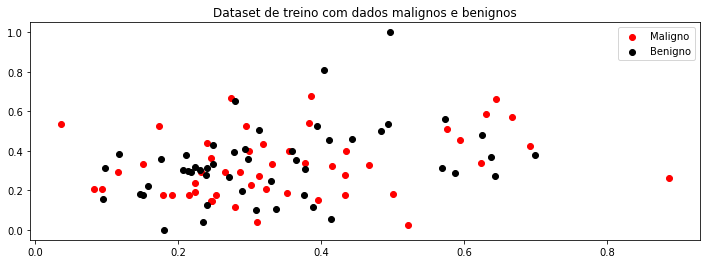

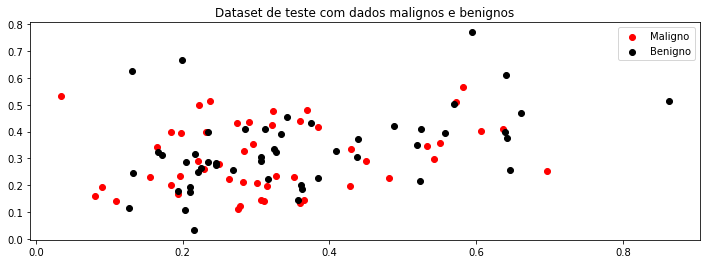

In [181]:
# Importando bibliotecas para visualização dos dados
import matplotlib.pyplot as plt 

df = pd.read_csv('cancer_train.csv')
points_1 = df[0:50].values.tolist()
points_2 = df[50:100].values.tolist()

points_1 = np.array(points_1)
points_2 = np.array(points_2)


## Plot the data points to visualize 
plt.figure(figsize=(12,4))
plt.scatter(points_1[:,0],points_1[:,1],color='red',label='Maligno')
plt.scatter(points_2[:,0],points_2[:,1],color='black',label='Benigno')
plt.legend()
plt.title('Dataset de treino com dados malignos e benignos')
plt.show()

# Importando bibliotecas para visualização dos dados
import matplotlib.pyplot as plt 

df = pd.read_csv('cancer_test.csv')
points_1 = df[0:50].values.tolist()
points_2 = df[50:100].values.tolist()

points_1 = np.array(points_1)
points_2 = np.array(points_2)


## Plot the data points to visualize 
plt.figure(figsize=(12,4))
plt.scatter(points_1[:,0],points_1[:,1],color='red',label='Maligno')
plt.scatter(points_2[:,0],points_2[:,1],color='black',label='Benigno')
plt.legend()
plt.title('Dataset de teste com dados malignos e benignos')
plt.show()
